In [ ]:
# https://www.tensorflow.org/tutorials/generative/autoencoder
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


X shape: (60000, 28, 28)  - type: uint8
y shape: (60000,)  - type: uint8


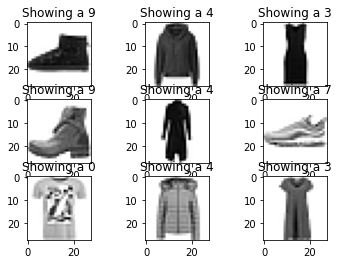

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print('X shape: ' + repr(X_train_full.shape) , ' - type: ' + str(X_train_full.dtype))
print('y shape: ' + repr(y_train_full.shape) , ' - type: ' + str(X_train_full.dtype))

tmpidxs = np.random.permutation( X_train_full.shape[0] )[:9]

plt.clf()
for i in range(9):
    plt.subplot(3,3,i+1)
    tmp_idx = tmpidxs[i]
    plt.imshow(X_train_full[tmp_idx,:,:], cmap='gray_r')
    plt.title('Showing a ' + str( y_train_full[tmp_idx] ) )
plt.show()

In [ ]:
# also readjust range to float 0-1 for gradient descend training

X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

# flatten input
# x_train = np.reshape( X_train, (len(X_train), np.prod(X_train.shape[1:])) )
# x_test = np.reshape( X_test, (len(X_test), np.prod(X_test.shape[1:])) )
# x_valid = np.reshape( X_valid, (len(X_valid), np.prod(X_valid.shape[1:])) )

# print(x_train.shape)

In [ ]:
encoder = keras.models.Sequential()
encoder.add(keras.layers.Flatten(input_shape=(28,28)))
encoder.add(keras.layers.Dense(256, activation='relu'))
encoder.add(keras.layers.Dense(64, activation='relu'))

decoder = keras.models.Sequential()
decoder.add(keras.layers.Dense(256, activation='relu'))
decoder.add(keras.layers.Dense(784, activation='sigmoid'))
decoder.add(keras.layers.Reshape((28,28)))

model = keras.models.Sequential( [encoder, decoder] )

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64)                217408    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            218128    
                                                                 
Total params: 435,536
Trainable params: 435,536
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam', # try sgd
              metrics=['cosine_similarity'])

In [ ]:
history = model.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0207 - cosine_similarity: 0.7922 - val_loss: 0.0128 - val_cosine_similarity: 0.8077
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0116 - cosine_similarity: 0.8136 - val_loss: 0.0105 - val_cosine_similarity: 0.8161
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0100 - cosine_similarity: 0.8194 - val_loss: 0.0098 - val_cosine_similarity: 0.8191
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0092 - cosine_similarity: 0.8226 - val_loss: 0.0089 - val_cosine_similarity: 0.8222
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0087 - cosine_similarity: 0.8246 - val_loss: 0.0085 - val_cosine_similarity: 0.8239
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0083 - cosine_similarity: 0.8261 - val_loss: 0.0083 - val_cosine_similarity: 0.8245
Epoch 7/10
1719/1719 [

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')

def show_reconstruction(model, X, n_images=5):
    reconstruction_idxs = np.random.permutation(np.arange(X.shape[0]))[:n_images]
    reconstructions = model.predict(X[reconstruction_idxs])
    fig = plt.figure(figsize=(n_images*1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X[reconstruction_idxs[image_index]])
        plt.subplot(2, n_images, 1 + image_index + n_images)
        plot_image( reconstructions[image_index] )

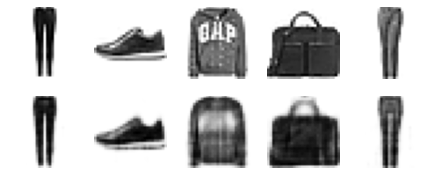

In [ ]:
show_reconstruction(model, X_valid)

In [ ]:
# compress all validation images
X_valid_compressed = encoder.predict(X_valid)
print('original size:' , X_valid.shape, ' - in MB: ', np.prod(X_valid.shape)*4/1000000)
print('compressed size:' , X_valid_compressed.shape, ' - in MB', np.prod(X_valid_compressed.shape)*4/1000000)

original size: (5000, 28, 28)  - in MB:  15.68
compressed size: (5000, 64)  - in MB 1.28


In [ ]:
# map in 2D
from sklearn.manifold import TSNE

tsne = TSNE(verbose=2)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 0.691s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.825449
[t-SNE] Computed conditional probabilities in 0.247s
[t-SNE] Iteration 50: error = 87.8941040, gradient norm = 0.0316117 (50 iterations in 2.834s)
[t-SNE] Iteration 100: error = 75.5126648, gradient norm = 0.0063049 (50 iterations in 2.253s)
[t-SNE] Iteration 150: error = 74.4169617, gradient norm = 0.0028453 (50 iterations in 2.137s)
[t-SNE] Iteration 200: error = 74.0915985, gradient norm = 0.0010469 (50 iterations in 2.242s)
[t-SNE] Iteration 250: error = 73.9502640, gradient norm = 0.0008994

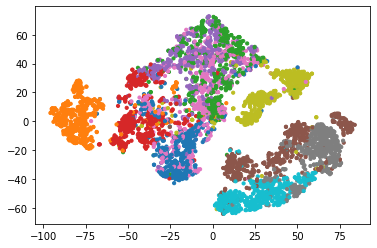

In [ ]:
# plot
plt.scatter(X_valid_2D[:,0], X_valid_2D[:,1], c=y_valid, s=10, cmap='tab10')

In [ ]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28,28]),
    keras.layers.Conv2D(16, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='selu'),
    keras.layers.MaxPool2D(pool_size=2)
])

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='valid',
                                 activation='selu', input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding='same',
                                 activation='selu'),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='same',
                                 activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_encoder.summary()
conv_decoder.summary()
conv_ae.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)         

In [ ]:
conv_ae.compile(loss='mean_squared_error',
              optimizer='adam', # try sgd
              metrics=['cosine_similarity'])

In [ ]:
history = conv_ae.fit(X_train, X_train, validation_data=(X_train, X_train), 
                      epochs=10)

Epoch 1/10
1719/1719 [==============================] - 95s 55ms/step - loss: 0.0167 - cosine_similarity: 0.8012 - val_loss: 0.0102 - val_cosine_similarity: 0.8194
Epoch 2/10
1142/1719 [==================>...........] - ETA: 23s - loss: 0.0094 - cosine_similarity: 0.8227

KeyboardInterrupt: ignored

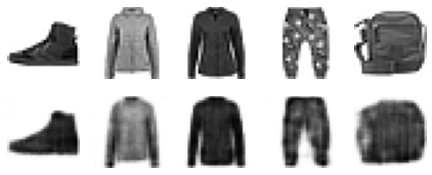

In [ ]:
show_reconstruction(conv_ae, X_valid)

In [ ]:
# compress all validation images
X_valid_compressed = conv_encoder.predict(X_valid)
print('original size:' , X_valid.shape, ' - in MB: ', np.prod(X_valid.shape)*4/1000000)
print('compressed size:' , X_valid_compressed.shape, ' - in MB', np.prod(X_valid_compressed.shape)*4/1000000)

original size: (5000, 28, 28)  - in MB:  15.68
compressed size: (5000, 3, 3, 64)  - in MB 11.52


In [ ]:
tsne = TSNE(verbose=2)
X_valid_reshaped = np.reshape(X_valid , ( X_valid.shape[0], np.prod(X_valid.shape[1:]) ) )
X_valid_2D = tsne.fit_transform( X_valid_reshaped )

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5000 samples in 1.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.882355
[t-SNE] Computed conditional probabilities in 0.241s
[t-SNE] Iteration 50: error = 87.2401886, gradient norm = 0.0427594 (50 iterations in 3.123s)
[t-SNE] Iteration 100: error = 74.1636963, gradient norm = 0.0072115 (50 iterations in 2.270s)
[t-SNE] Iteration 150: error = 73.1990967, gradient norm = 0.0022723 (50 iterations in 2.174s)
[t-SNE] Iteration 200: error = 72.9980927, gradient norm = 0.0006177 (50 iterations in 2.162s)
[t-SNE] Iteration 250: error = 72.9321442, gradient norm = 0.0003631 (50 iterations in 2.153s)
[t-SNE] KL divergence after 250 iterations with early exa

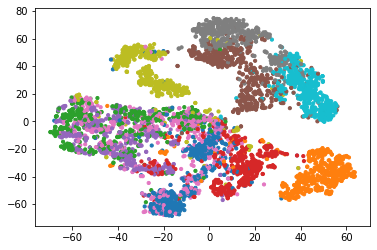

In [ ]:
# plot
plt.scatter(X_valid_2D[:,0], X_valid_2D[:,1], c=y_valid, s=10, cmap='tab10')

In [ ]:
# denoising
X_noise = X_valid + np.power(np.random.random( X_valid.shape ), 20)
X_noise[ X_noise > 1 ] = 1

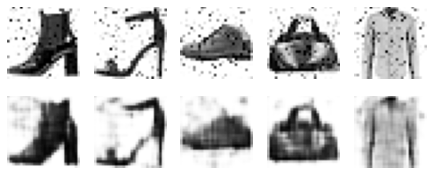

In [ ]:
show_reconstruction(conv_ae, X_noise)